<a href="https://colab.research.google.com/github/santiagoed4/AnomalyDetection/blob/master/Safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from IPython.display import display, HTML, display_html
import seaborn as sns
import datetime
import tensorflow as tf

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from xgboost import XGBClassifier
import xgboost

# Import package for machine learning methods
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM


# Deep learning
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential 
from keras.callbacks import History 
from keras.layers import LSTM
from keras.layers import Dense


# Train-test split
from sklearn.model_selection import train_test_split


# Hyperparameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# Metrics

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

# Additionals

from pprint import pprint
from math import sqrt

#Style
plt.style.use('seaborn-whitegrid')


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1uxFW7QzYCpScH7hxRtEEPP_qYTP2sTGI'

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1uxFW7QzYCpScH7hxRtEEPP_qYTP2sTGI


## Data

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Data_safety.csv')  
df = pd.read_csv('Data_safety.csv')
# Dataset is now stored in a Pandas Dataframe
df.head(3)

W0705 12:40:00.170797 140562740201344 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

,Choke size (in),Wellhead pressure (psi),Sediment water (%),Gas liquid ratio (sfc/stb),Flow (stb/day)
0,64.0,450.0,28.0,73.0,17700
1,64.0,538.0,12.4,400.0,6400
2,64.0,540.0,15.0,356.0,6870


## Data Analysis

In [0]:
stats_description = df.describe()
stats_description

,Choke size (in),Wellhead pressure (psi),Sediment water (%),Gas liquid ratio (sfc/stb),Flow (stb/day)
count,182.000000,182.000000,182.000000,182.000000,182.000000
mean,57.670330,518.648901,19.600385,251.668132,9734.280220
std,10.886737,121.135174,13.204150,159.825632,6939.234547
min,25.600000,133.000000,0.020000,36.000000,205.000000
25%,52.480000,441.250000,10.000000,119.500000,4706.000000
50%,64.000000,506.500000,18.300000,227.000000,8400.000000
75%,64.000000,580.000000,28.000000,357.500000,13625.000000
max,64.000000,881.000000,66.000000,885.000000,34450.000000


In [0]:
 stats_description.to_excel("output.xlsx") 

In [0]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

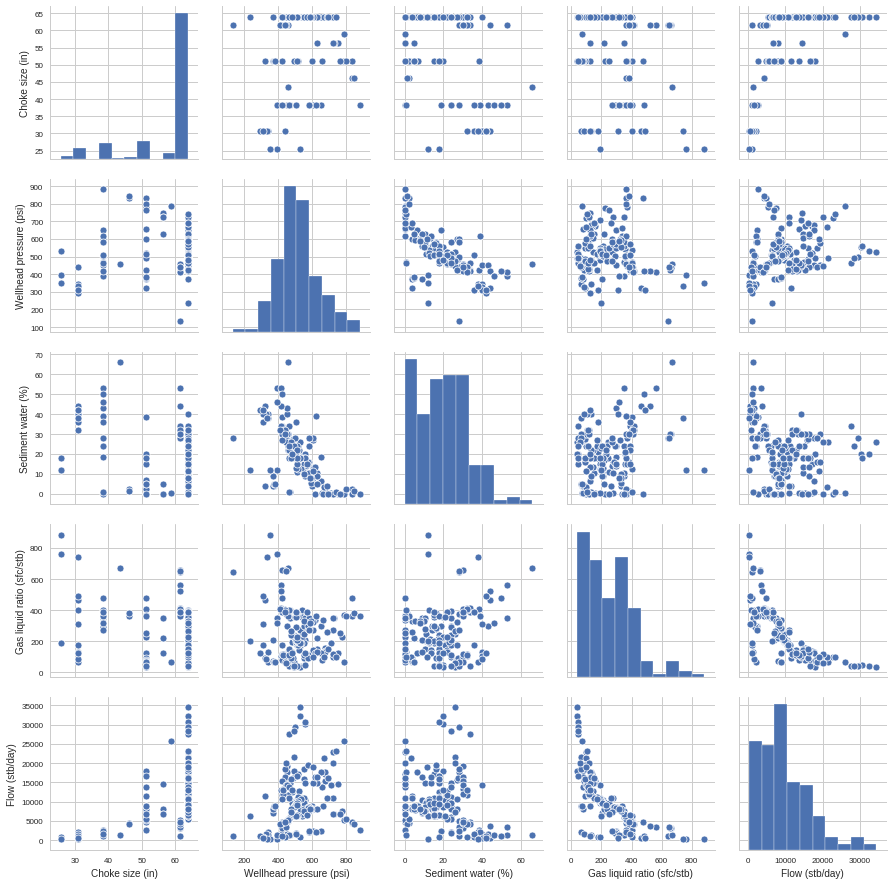

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)


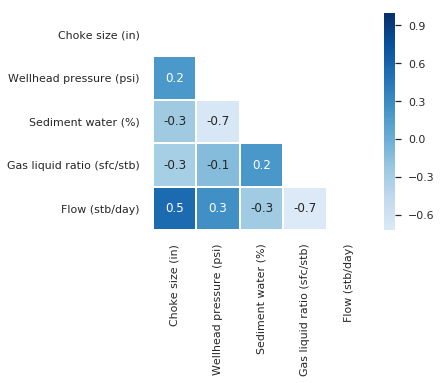

In [0]:
sns.set(style="white")

corr = df.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap="Blues", mask= mask, annot=True, fmt=".1f", vmax=1, center=0, square=True, linewidths=1, cbar_kws={"shrink": 1})


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


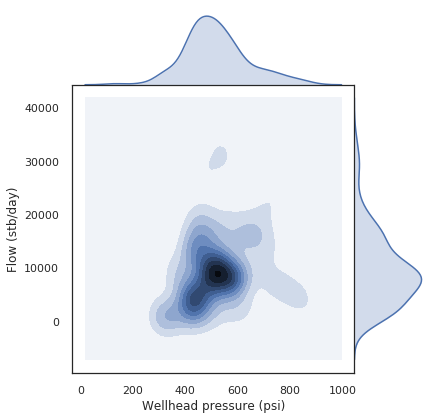

In [0]:
jp = sns.jointplot(data=df, x='Wellhead pressure (psi)',  y='Flow (stb/day)',  kind='kde',  space=0, size=6, ratio=4)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


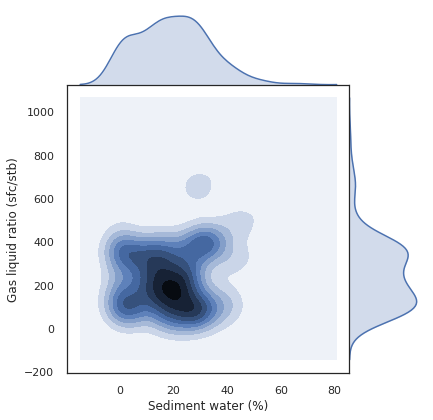

In [0]:
jp = sns.jointplot(data=df, x='Sediment water (%)', y='Gas liquid ratio (sfc/stb)',  kind='kde',  space=0, size=6, ratio=4)

In [0]:
dfnew = df.filter(['Choke size (in)', 'Wellhead pressure (psi)', 'Sediment water (%)','Gas liquid ratio (sfc/stb)'], axis=1) 
dfnew.shape

(182, 4)

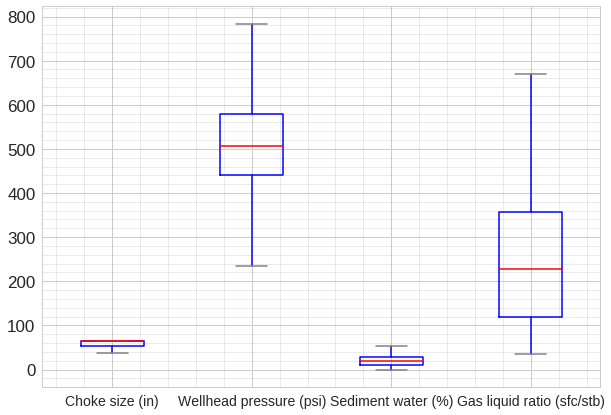

In [0]:
plt.style.use('seaborn-whitegrid')

ax = dfnew.plot(kind='box',
             color=dict(boxes='blue', whiskers='blue', medians='red', caps='grey'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=False, grid=True, rot=0, figsize=(10,7))
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(15)
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

# plt.rc('font', size=8)          # controls default text sizes
# plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=17)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig.savefig('plot.pdf')

In [0]:
columns_name=['Choke size (in)', 'Wellhead pressure (psi)', 'Sediment water (%)','Gas liquid ratio (sfc/stb)']

In [0]:
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
scaler_all_data = MinMaxScaler()
data_scaled = scaler_all_data.fit_transform(dfnew)
df_data_scaled=pd.DataFrame(data_scaled)
df_data_scaled.columns = columns_name
df_data_scaled.head(5)

,Choke size (in),Wellhead pressure (psi),Sediment water (%),Gas liquid ratio (sfc/stb)
0,1.000000,0.423797,0.424068,0.043581
1,1.000000,0.541444,0.187633,0.428740
2,1.000000,0.544118,0.227038,0.376914
3,0.666667,0.389037,0.583207,0.435807
4,0.666667,0.624332,0.105790,0.104829


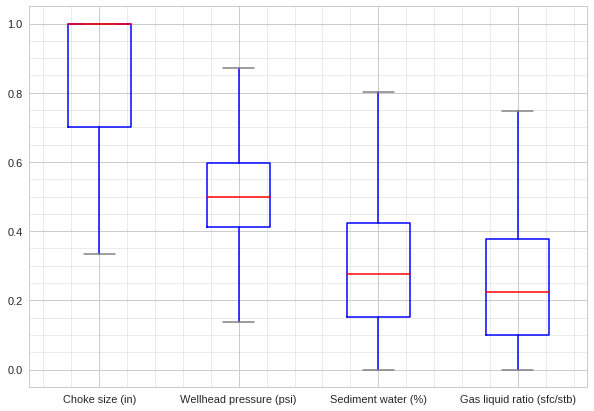

In [0]:
ax = df_data_scaled.plot(kind='box',
             color=dict(boxes='blue', whiskers='blue', medians='red', caps='grey'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=False, grid=True, rot=0, figsize=(10,7))
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

In [0]:
flow_data=df['Flow (stb/day)']


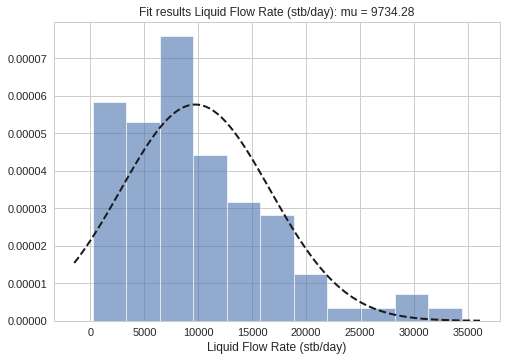

In [0]:
from scipy.stats import norm
# Fit a normal distribution to the data:
mu, std = norm.fit(flow_data)
# Plot the histogram.
plt.hist(flow_data, bins='auto', density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, '--k', linewidth=2)
title = "Fit results Liquid Flow Rate (stb/day): mu = %.2f" % (mu)
plt.title(title)
plt.xlabel('Liquid Flow Rate (stb/day)'); 

plt.show()

In [0]:
X = df[df.columns.difference(['Flow (stb/day)'])]
y = df[['Flow (stb/day)']]
print('Features shape:', X.shape)
print('Target shape', y.shape)

Features shape: (182, 4)
Target shape (182, 1)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X train:', X_train.shape)
print('X test:', X_test.shape)
print('y train:', y_train.shape)
print('y test:', y_test.shape)

X train: (127, 4)
X test: (55, 4)
y train: (127, 1)
y test: (55, 1)


In [0]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train_scaled = scalerX.transform(X_train)
y_train_scaled = scalery.transform(y_train)
X_test_scaled = scalerX.transform(X_test)
y_test_scaled = scalery.transform(y_test)

In [0]:
#Standarization
min_max_scaler=preprocessing.StandardScaler()
np_scaled=min_max_scaler.fit_transform(df)
df_scaled=pd.DataFrame(np_scaled)
df_scaled.head(5)
df_scaled.shape

(182, 5)

## Predictions

### Random Forest

In [0]:
# Random analysis to fit Random forest 
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train) #Random_state is the seed used by the random number generator
predictions_rf = rf.predict(X_test)

# Metrics
print('Model score:',              round(rf.score(X_test, y_test),2))
print('Mean absolute error:',      round(mean_absolute_error(y_test, predictions_rf),2))
print('Root mean squared error:',  round(sqrt(mean_squared_error(y_test, predictions_rf)),2))
print('R2:',                       round(r2_score(y_test, predictions_rf),2))

Model score: 0.93
Mean absolute error: 1042.86
Root mean squared error: 1896.67
R2: 0.93


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


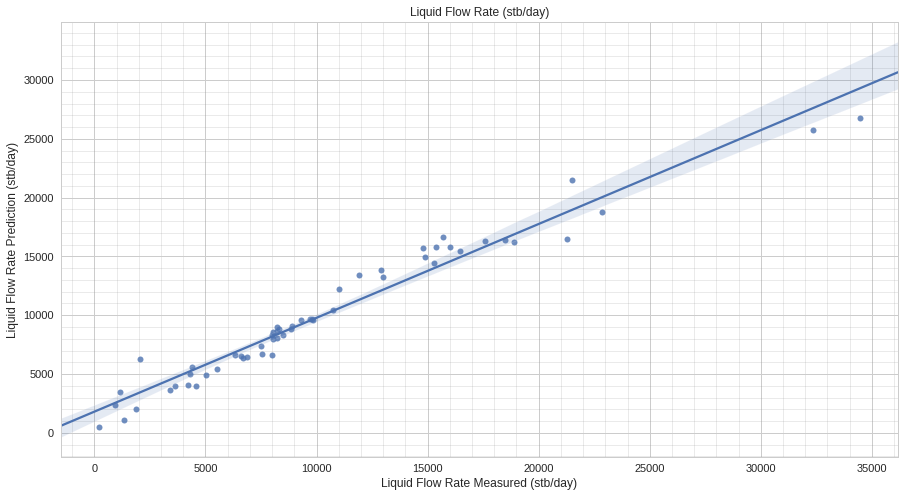

In [0]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(15,8))
tips = sns.load_dataset("tips")
ax = sns.regplot(y_test, predictions_rf, data=tips)
plt.ylabel('Liquid Flow Rate Prediction (stb/day)'); plt.xlabel('Liquid Flow Rate Measured (stb/day)'); plt.title('Liquid Flow Rate (stb/day)');
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

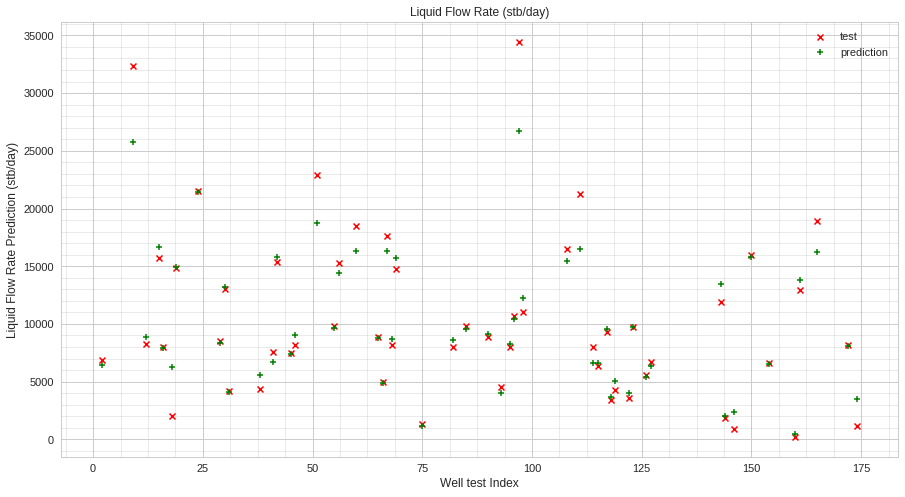

In [0]:
fig, ax=plt.subplots(figsize=(15,8))

ax.scatter(y_test.index, y_test, color='red', marker = 'x', label="test")
ax.scatter(y_test.index, predictions_rf, color='green', marker = '+' ,label="prediction")
plt.ylabel('Liquid Flow Rate Prediction (stb/day)'); plt.xlabel('Well test Index'); plt.title('Liquid Flow Rate (stb/day)');
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

### XGBoost

In [0]:
from xgboost import XGBClassifier
import xgboost

In [0]:
# Random analysis to fit Random forest 
xgb = xgboost.XGBRegressor().fit(X_train, y_train) #Random_state is the seed used by the random number generator
predictions_xgb = xgb.predict(X_test)

# Metrics
print('Model score:',              round(xgb.score(X_test, y_test),2))
print('Mean absolute error:',      round(mean_absolute_error(y_test, predictions_xgb),2))
print('Root mean squared error:',  round(sqrt(mean_squared_error(y_test, predictions_xgb)),2))
print('R2:',                       round(r2_score(y_test, predictions_xgb),2))

[12:34:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model score: 0.97
Mean absolute error: 755.99
Root mean squared error: 1188.28
R2: 0.97


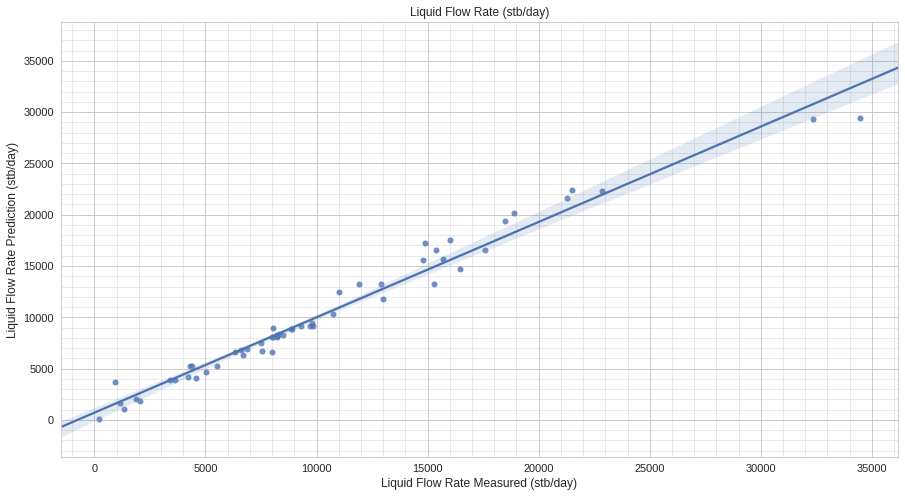

In [0]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(15,8))
tips = sns.load_dataset("tips")
ax = sns.regplot(y_test, predictions_xgb, data=tips)
plt.ylabel('Liquid Flow Rate Prediction (stb/day)'); plt.xlabel('Liquid Flow Rate Measured (stb/day)'); plt.title('Liquid Flow Rate (stb/day)');
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

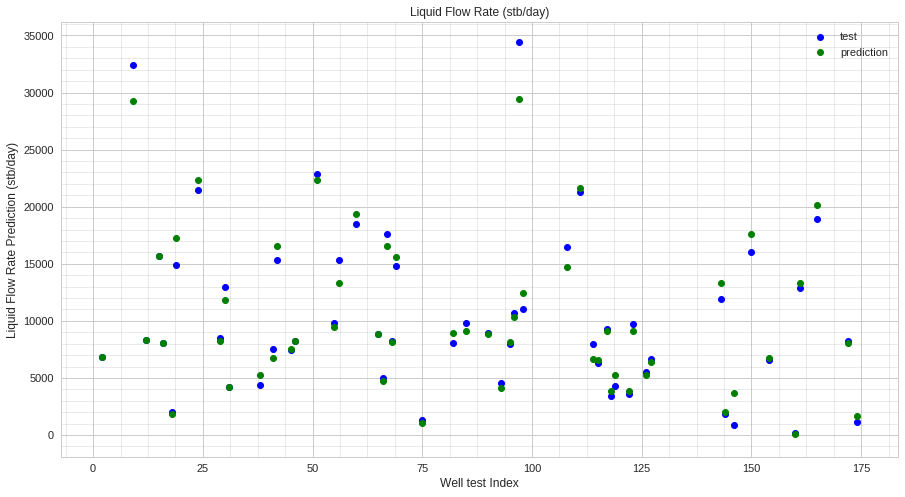

In [0]:
fig, ax=plt.subplots(figsize=(15,8))

ax.scatter(y_test.index, y_test,  color='blue', label="test")
ax.scatter(y_test.index, predictions_xgb,  color='green', label="prediction")
plt.ylabel('Liquid Flow Rate Prediction (stb/day)'); plt.xlabel('Well test Index'); plt.title('Liquid Flow Rate (stb/day)');
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

### Neural networks

In [0]:
nn_regressor= MLPRegressor()    
model_nn=nn_regressor.fit(X_train_scaled, y_train_scaled)
predictions_nn = nn_regressor.predict(X_test_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
print('Model score:', nn_regressor.score(X_test_scaled, y_test_scaled))
print('Mean absolute error:', mean_absolute_error(y_test_scaled, predictions_nn))
print('Root mean squared error:', sqrt(mean_squared_error(y_test_scaled, predictions_nn)))
print('R2:', r2_score(y_test_scaled, predictions_nn) )

Model score: 0.8975493367151521
Mean absolute error: 0.18596029253797453
Root mean squared error: 0.3329700267383471
R2: 0.8975493367151521


In [0]:
predictions_nn_rescale = scalery.inverse_transform(predictions_nn, copy=None)

In [0]:
print('Mean absolute error:', mean_absolute_error(y_test, predictions_nn_rescale ))
print('Root mean squared error:', sqrt(mean_squared_error(y_test, predictions_nn_rescale )))

Mean absolute error: 1268.9938864876865
Root mean squared error: 2272.188984798024


### Global result predictions


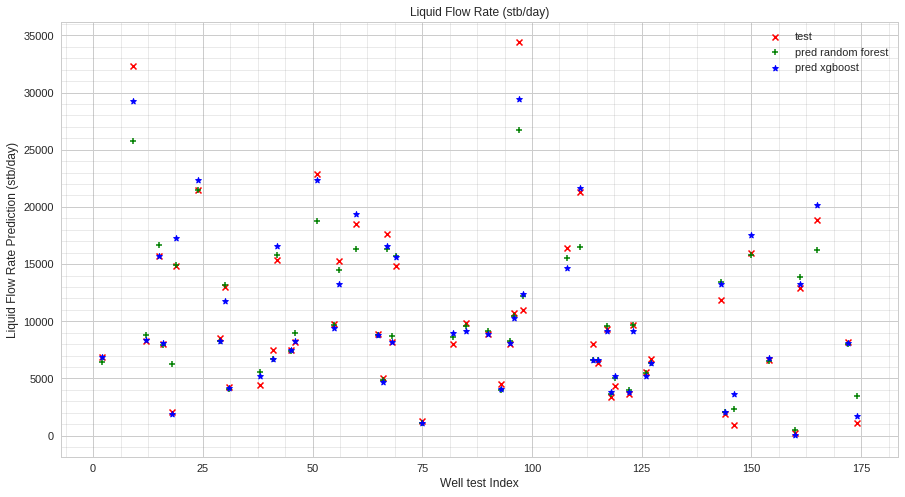

In [0]:
fig, ax=plt.subplots(figsize=(15,8))

ax.scatter(y_test.index, y_test, color='red', marker = 'x', label="test")
ax.scatter(y_test.index, predictions_rf, color='green', marker = '+' ,label="pred random forest")
ax.scatter(y_test.index, predictions_xgb,  color='blue', marker = '*', label="pred xgboost")
plt.ylabel('Liquid Flow Rate Prediction (stb/day)'); plt.xlabel('Well test Index'); plt.title('Liquid Flow Rate (stb/day)');
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

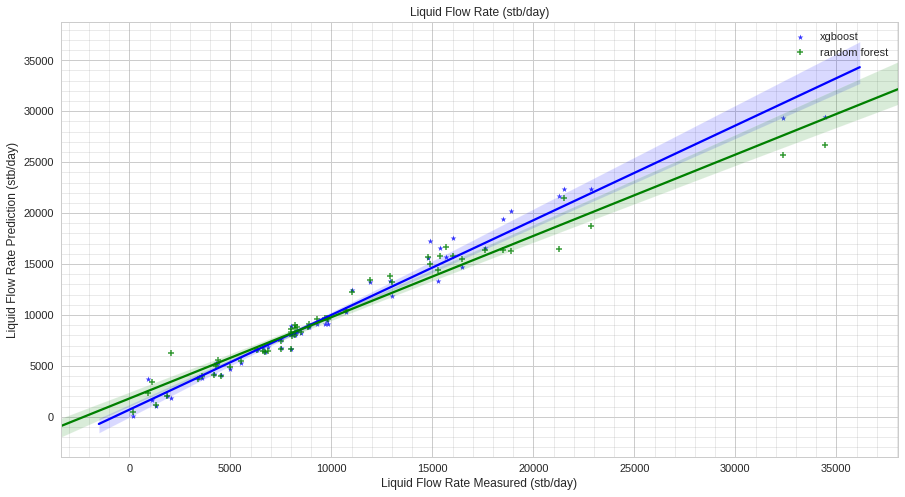

In [0]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(15,8))
tips = sns.load_dataset("tips")
ax = sns.regplot(y_test, predictions_xgb, data=tips,  color='blue', marker = '*', label="xgboost")
ax = sns.regplot(y_test, predictions_rf, data=tips, color='green', marker = '+', label="random forest")
plt.ylabel('Liquid Flow Rate Prediction (stb/day)'); plt.xlabel('Liquid Flow Rate Measured (stb/day)'); plt.title('Liquid Flow Rate (stb/day)');
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

## Anomaly detection

### Isolation forest

In [0]:
outliers_fraction=0.05

In [0]:
from sklearn.ensemble import IsolationForest
#Train Isolation Forest model

modelIF=IsolationForest(contamination = outliers_fraction)
modelIF.fit(df)
df['anomaly IF']=pd.Series(modelIF.predict(df))
df['anomaly IF']=df['anomaly IF'].map({1:0,-1:1})
print(df['anomaly IF'].value_counts())


0    172
1     10
Name: anomaly IF, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


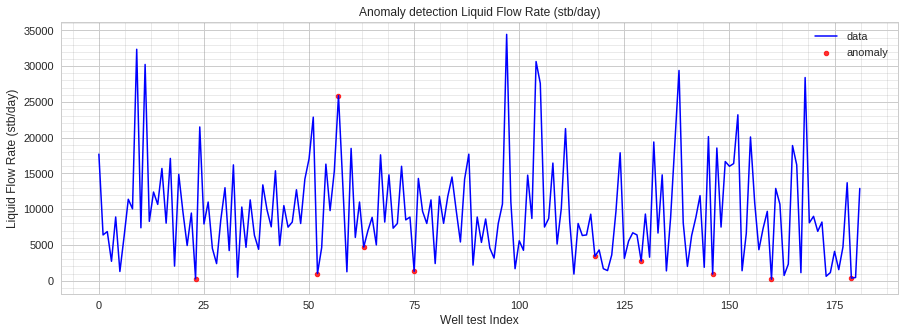

In [0]:
#Visualization of anomaly (In this case to compare to ROP) (How can I know from which variable is defined the anomaly?)
fig, ax=plt.subplots(figsize=(15,5))
a=df.loc[df['anomaly IF']==1,['Flow (stb/day)']] #anomaly
#ax.scatter(df.index, df['Flow (stb/day)'], color='blue', label="data", alpha=0.8, s=20)
ax.plot(df.index, df['Flow (stb/day)'], color='blue', label="data")
ax.scatter(a.index, a['Flow (stb/day)'], color='red', label="anomaly",  alpha=0.8, s=20)

plt.legend(loc='lower right')
plt.ylabel('Liquid Flow Rate (stb/day)'); plt.xlabel('Well test Index'); plt.title('Anomaly detection Liquid Flow Rate (stb/day)');
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

In [0]:
df

,Choke size (in),Wellhead pressure (psi),Sediment water (%),Gas liquid ratio (sfc/stb),Flow (stb/day),anomaly IF
0,64.00,450.0,28.0,73.0,17700,0
1,64.00,538.0,12.4,400.0,6400,0
2,64.00,540.0,15.0,356.0,6870,0
3,51.20,424.0,38.5,406.0,2715,0
4,51.20,600.0,7.0,125.0,8910,0
5,38.40,392.0,53.0,351.0,1289,0
6,64.00,510.0,16.0,380.0,6180,0
7,51.20,321.0,4.0,92.0,11390,0
8,64.00,501.0,24.0,189.0,10049,0
9,64.00,530.0,20.0,39.0,32365,0


### Cluster


In [0]:
# Normalization
# Reduce to 2 important features

pca=PCA(n_components=2)
data_pca=pca.fit_transform(df_scaled)

#standarize these 2 new features
min_max_scaler_pca=preprocessing.StandardScaler()
np_scaled=min_max_scaler_pca.fit_transform(data_pca)
data_pca=pd.DataFrame(np_scaled)
#data_pca

<function matplotlib.pyplot.show>

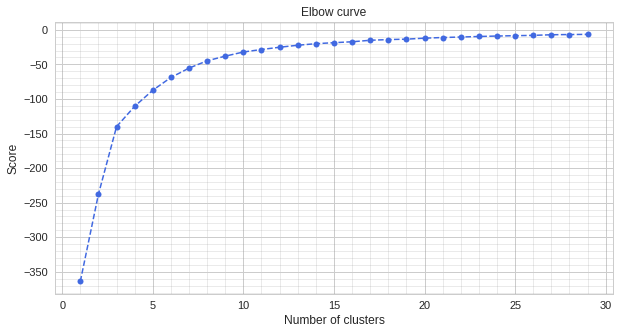

In [0]:
# Calculate with different number of centroids to see the loss plot (elbow method)
n_cluster=range(1,30)
kmeans=[KMeans(n_clusters=i).fit(data_pca) for i in n_cluster]
scores=[kmeans[i].score(data_pca) for i in range(len(kmeans))]
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(n_cluster,scores, linestyle='--', marker='o', color='royalblue')
plt.ylabel('Score'); plt.xlabel('Number of clusters'); plt.title('Elbow curve');
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show

In [0]:
df['cluster'] = kmeans[14].predict(data_pca)
df['principal_feature1']=data_pca[0]
df['principal_feature2']=data_pca[1]
df['cluster'].value_counts()

8     28
11    19
9     19
3     16
2     14
10    13
4     13
7     12
5     10
13     9
0      8
14     7
1      7
6      5
12     2
Name: cluster, dtype: int64

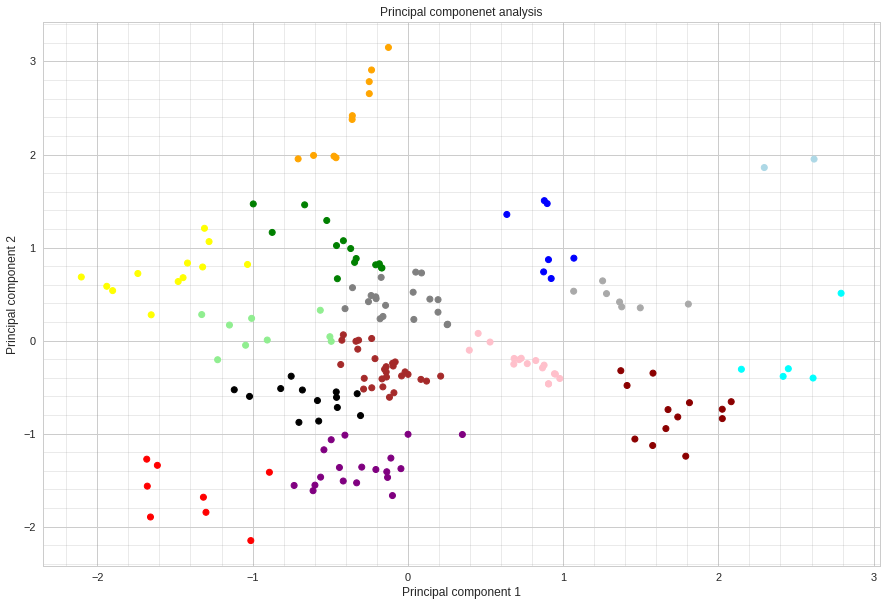

In [0]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots(figsize=(15,10))
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'darkred', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.ylabel('Principal component 2'); plt.xlabel('Principal component 1'); plt.title('Principal componenet analysis');
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

In [0]:
# return Series of distance between each point and his distance with the closest centroid
def getDistanceByPoint(data_pca, model):
    distance = pd.Series()
    for i in range(0,len(data_pca)):
        Xa = np.array(data_pca.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance
  
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data_pca, kmeans[14])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# Then we add the column of the anomaly detected with clustering method 
df['anomalyCluster'] = (distance >= threshold).astype(int)
print(df['anomalyCluster'].value_counts()) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


0    173
1      9
Name: anomalyCluster, dtype: int64


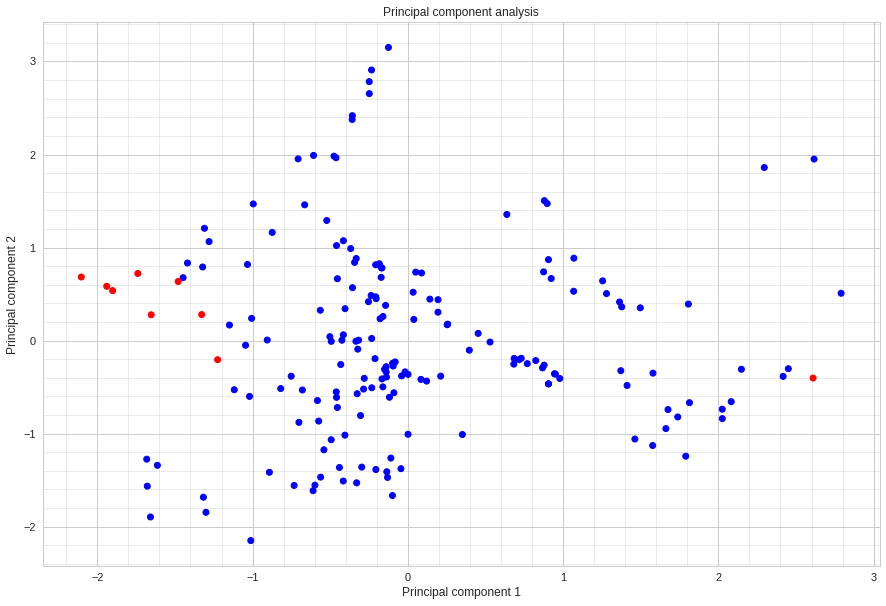

In [0]:
# visualisation of anomaly with cluster view
fig, ax = plt.subplots(figsize=(15,10))
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomalyCluster"].apply(lambda x: colors[x]))
plt.ylabel('Principal component 2'); plt.xlabel('Principal component 1'); plt.title('Principal component analysis');
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

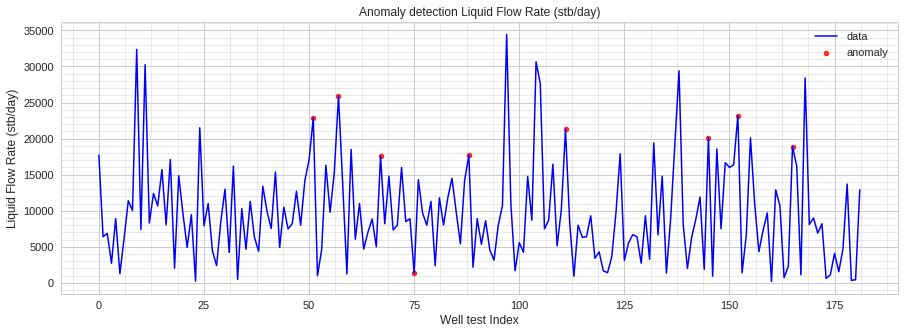

In [0]:
#Visualization of anomaly
fig, ax=plt.subplots(figsize=(15,5))
a_cluster=df.loc[df['anomalyCluster']==1,['Flow (stb/day)']] #anomaly
#ax.scatter(df.index, df['Flow (stb/day)'], color='blue', label="data", alpha=0.8, s=20)
ax.plot(df.index, df['Flow (stb/day)'], color='blue', label="data")
ax.scatter(a_cluster.index, a_cluster['Flow (stb/day)'], color='red', label="anomaly",  alpha=0.8, s=20)

plt.legend(loc='lower right')
plt.ylabel('Liquid Flow Rate (stb/day)'); plt.xlabel('Well test Index'); plt.title('Anomaly detection Liquid Flow Rate (stb/day)');
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

### One class support vector

In [0]:
#train one class SVM
model_svm=OneClassSVM(nu=outliers_fraction)
model_svm.fit(df_scaled)
df['anomaly_sv']=pd.Series(model_svm.predict(df_scaled))
df['anomaly_sv']=df['anomaly_sv'].map({1:0,-1:1})
print(df['anomaly_sv'].value_counts())


0    169
1     13
Name: anomaly_sv, dtype: int64


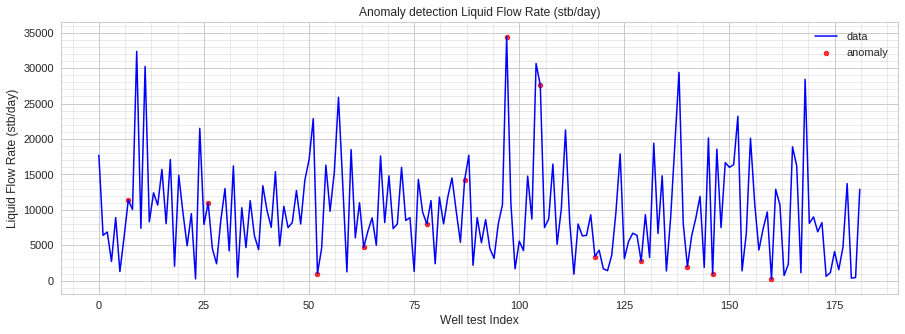

In [0]:
#Visualization of anomaly
fig, ax=plt.subplots(figsize=(15,5))
a_ocsv=df.loc[df['anomaly_sv']==1,['Flow (stb/day)']] #anomaly
# ax.scatter(df.index, df['Flow (stb/day)'], color='blue', label="data", alpha=0.8, s=20)
ax.plot(df.index, df['Flow (stb/day)'], color='blue', label="data")
ax.scatter(a_ocsv.index, a_ocsv['Flow (stb/day)'], color='red', label="anomaly",  alpha=0.8, s=20)

plt.legend(loc='lower right')
plt.ylabel('Liquid Flow Rate (stb/day)'); plt.xlabel('Well test Index'); plt.title('Anomaly detection Liquid Flow Rate (stb/day)');
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

### Global result


In [0]:
#df

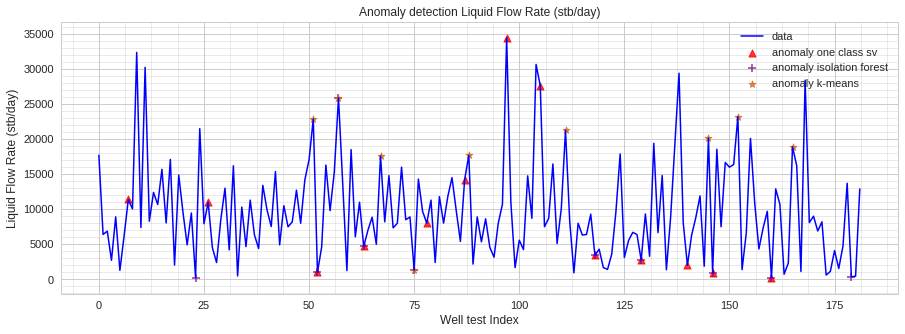

In [0]:
#Visualization of anomaly
fig, ax=plt.subplots(figsize=(15,5))


ax.plot(df.index, df['Flow (stb/day)'], color='blue', label="data")
# One class support vector
ax.scatter(a_ocsv.index, a_ocsv['Flow (stb/day)'], marker='^', color='red', label="anomaly one class sv",  alpha=0.8, s=50)
# Isolation forest
ax.scatter(a.index, a['Flow (stb/day)'], marker='+', color='purple', label="anomaly isolation forest",  alpha=0.8, s=50)
# k means clustering
ax.scatter(a_cluster.index, a_cluster['Flow (stb/day)'], marker='*', color='chocolate', label="anomaly k-means",  alpha=0.8, s=50)

plt.legend(loc='lower right')
plt.ylabel('Liquid Flow Rate (stb/day)'); plt.xlabel('Well test Index'); plt.title('Anomaly detection Liquid Flow Rate (stb/day)');
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

## Autoencoders

In [0]:
df_auto= df.filter(['Choke size (in)', 'Wellhead pressure (psi)', 'Sediment water (%)','Gas liquid ratio (sfc/stb)', 'Flow (stb/day)'], axis=1) 
df_auto.shape

(182, 5)

In [0]:
train_size_split=int(len(df_auto)*0.70)
test_size_split=len(df_auto)-train_size_split

In [0]:
train_x_split=df_auto.iloc[0:train_size_split,:]
test_x_split=df_auto.iloc[train_size_split:len(df_auto),:]


print("x_train", train_x_split.shape)
print("x_test", test_x_split.shape)


x_train (127, 5)
x_test (55, 5)


In [0]:
# # Visualization of Predictions
# fig, ax=plt.subplots(figsize=(5,20))
# ax.scatter(train_x_split['ROP(1 ft)'], tn_Xrai['Depth(ft)'], color='blue', label="Train")
# ax.scatter(predictions_rf['ROP(1 ft)'], test_X['Depth(ft)'], color='gray', label="Test")
# # ax.scatter(predictions_rf['ROP_Pred'], test_X['Depth(ft)'], color='green', label="Prediction")
# ay = plt.gca()
# ay.set_ylim(ay.get_ylim()[::-1])
# plt.ylabel('Depth (ft)'); plt.xlabel('Rate of penetration (ft/hr)'); plt.title('Rate of penetration');
# plt.legend(loc="best")
# plt.show()

In [0]:
test_x_split.index

RangeIndex(start=127, stop=182, step=1)

In [0]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(train_x_split)
train_x_scaled = scalerX.transform(train_x_split)
test_x_scaled = scalerX.transform(test_x_split)

print("x_train", train_x_scaled.shape)
print("x_test", test_x_scaled.shape)

x_train (127, 5)
x_test (55, 5)


In [0]:
input_dim = train_x_scaled.shape[1]
input_dim

5

In [0]:

# Deep learning
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential 
from keras.callbacks import History 
from keras.layers import LSTM
from keras.layers import Dense #
from keras.models import Model, load_model #
from keras.layers import Input, Dense #
from keras.callbacks import ModelCheckpoint, TensorBoard #
from keras import regularizers #
from keras import optimizers

In [0]:
# Number of neurons in each layer  [5 4 3 2 3 4 5]
input_dim = train_x_scaled.shape[1]
encoding_dim= 4

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation= "tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(3), activation = "tanh")(encoder)
encoder = Dense(int(2), activation="tanh")(encoder)
decoder = Dense(int(3), activation = 'tanh')(encoder)
decoder = Dense(int(encoding_dim), activation= 'tanh')(decoder)
decoder = Dense(input_dim, activation= 'tanh')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

W0705 12:34:50.729280 140562740201344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 12:34:50.766035 140562740201344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 12:34:50.774205 140562740201344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 25        
Total para

In [0]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
autoencoder.compile(loss='mean_squared_error', optimizer=adam)
history=autoencoder.fit(train_x_scaled, train_x_scaled, epochs=300, batch_size=20, shuffle=True, validation_split=0.2, verbose=0)
df_history=pd.DataFrame(history.history)

W0705 12:34:50.910824 140562740201344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0705 12:34:51.082160 140562740201344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0705 12:34:51.425596 140562740201344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



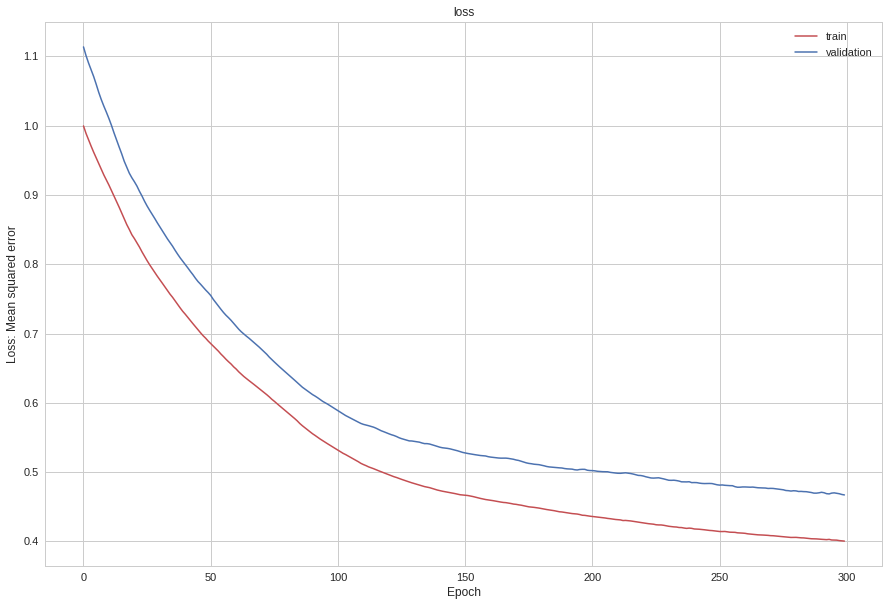

In [0]:
fig, ax=plt.subplots(figsize=(15,10))
plt.title("loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")
plt.ylabel('Loss: Mean squared error'); plt.xlabel('Epoch');

In [0]:
# Prediction and reconstruction error
predictions = autoencoder.predict(test_x_scaled)
mse = np.mean(np.power(test_x_scaled - predictions, 2), axis = 1)
df_error = pd.DataFrame( {'reconstruction_error' : mse}, index=test_x_split.index)
#df_error
df_error.describe()

,reconstruction_error
count,55.000000
mean,0.623685
std,0.828407
min,0.011931
25%,0.064730
50%,0.200104
75%,0.919975
max,4.303786


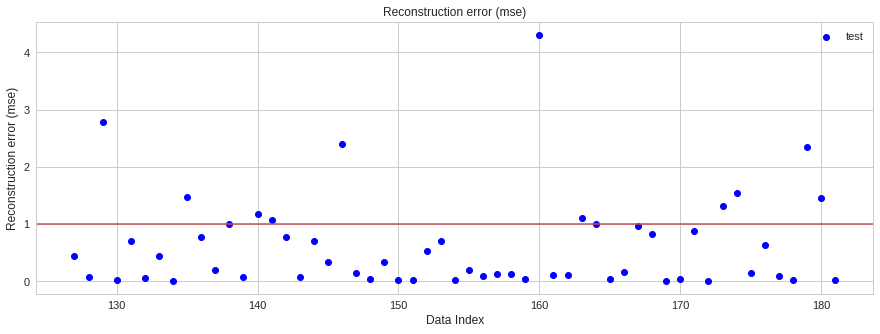

In [0]:
fig, ax=plt.subplots(figsize=(15,5))
ax.scatter(test_x_split.index, df_error['reconstruction_error'] , color='blue', label="test")


plt.axhline(1,color='r')

plt.legend(loc="best")
plt.xlabel('Data Index'); plt.ylabel('Reconstruction error (mse)'); plt.title('Reconstruction error (mse)');

plt.show()

In [0]:
prediction_frame=pd.DataFrame(predictions, index=test_x_split.index)
#prediction_frame

In [0]:
prediction_frame.columns = ['Choke size (in)', 'Wellhead pressure (psi)', 'Sediment water (%)','Gas liquid ratio (sfc/stb)', 'Flow (stb/day)']
#prediction_frame.head(5)

In [0]:
predictions_auto_rescale= scalerX.inverse_transform(prediction_frame)
#predictions_auto_rescale

In [0]:
prediction_frame_rescale=pd.DataFrame(predictions_auto_rescale, index=test_x_split.index)
#prediction_frame_rescale

In [0]:
numerical_cols = ['Choke size (in)', 'Wellhead pressure (psi)', 'Sediment water (%)','Gas liquid ratio (sfc/stb)', 'Flow (stb/day)']

In [0]:
prediction_frame_rescale.columns = ['Choke size (in)', 'Wellhead pressure (psi)', 'Sediment water (%)','Gas liquid ratio (sfc/stb)', 'Flow (stb/day)']
#prediction_frame_rescale.head(5)

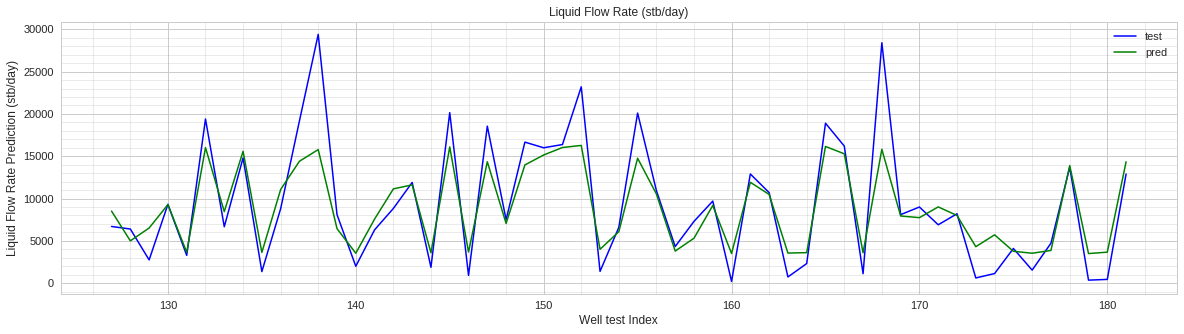

In [0]:
fig, ax=plt.subplots(figsize=(20,5))

ax.plot(test_x_split.index, test_x_split['Flow (stb/day)'], color='blue', marker = 'x', label="test")
ax.plot(test_x_split.index, prediction_frame_rescale['Flow (stb/day)'], color='green', marker = '+' ,label="pred")

plt.ylabel('Liquid Flow Rate Prediction (stb/day)'); plt.xlabel('Well test Index'); plt.title('Liquid Flow Rate (stb/day)');
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

In [0]:
#Convert X_test_scaled to pandas DataFrame
data_n=pd.DataFrame(test_x_scaled, index=test_x_split.index, columns=numerical_cols)
#data_n

In [0]:
# Euclidean distance between the actual and the predicted data points for each feature

def compute_error_per_dim(point):
  
  initial_pt = np.array(data_n.loc[point,:]).reshape(1,5) # X_test
  reconstructed_pt = autoencoder.predict(initial_pt)      # Predictions
  
  return abs(np.array(initial_pt - reconstructed_pt)[0])

In [0]:
# Bring the Index of outliers
# Define limit of mse
outliers = df_error.index[df_error.reconstruction_error > 1].tolist()

In [0]:
outliers

[129, 135, 138, 140, 141, 146, 160, 163, 164, 173, 174, 179, 180]

In [0]:
# Reconstruction error per dimension

RE_per_dim = {}
for ind in outliers:
  RE_per_dim[ind] = compute_error_per_dim(ind)
  
RE_per_dim = pd.DataFrame(RE_per_dim, index = numerical_cols).T

In [0]:
#RE_per_dim.head()
RE_per_dim

,Choke size (in),Wellhead pressure (psi),Sediment water (%),Gas liquid ratio (sfc/stb),Flow (stb/day)
129,2.629641,2.421967,0.905276,0.060095,0.563065
135,1.673597,0.263179,2.093319,0.090353,0.337775
138,0.080362,0.265949,0.831991,0.394147,2.033052
140,1.569136,1.683989,0.733183,0.171680,0.229712
141,0.959991,1.561998,1.360018,0.342481,0.190706
146,2.926735,0.941164,0.905976,1.256027,0.410959
160,2.888500,0.586749,1.373140,3.271470,0.493148
163,2.295209,0.208550,0.108554,0.098839,0.421765
164,1.627697,1.338611,0.060384,0.755786,0.192061
173,2.253915,0.864218,0.657337,0.000601,0.551406


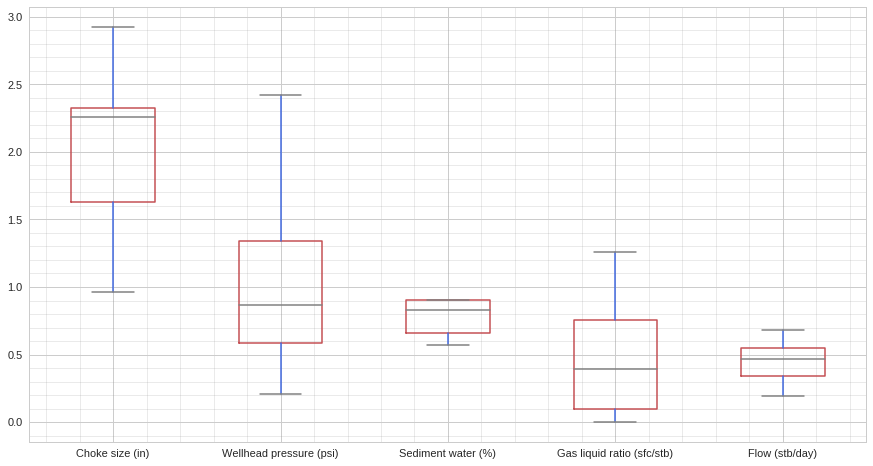

In [0]:
ax = RE_per_dim.plot(kind='box',
             color=dict(boxes='r', whiskers='royalblue', medians='Gray', caps='Gray'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=False, grid=True, rot=0, figsize=(15,8))
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

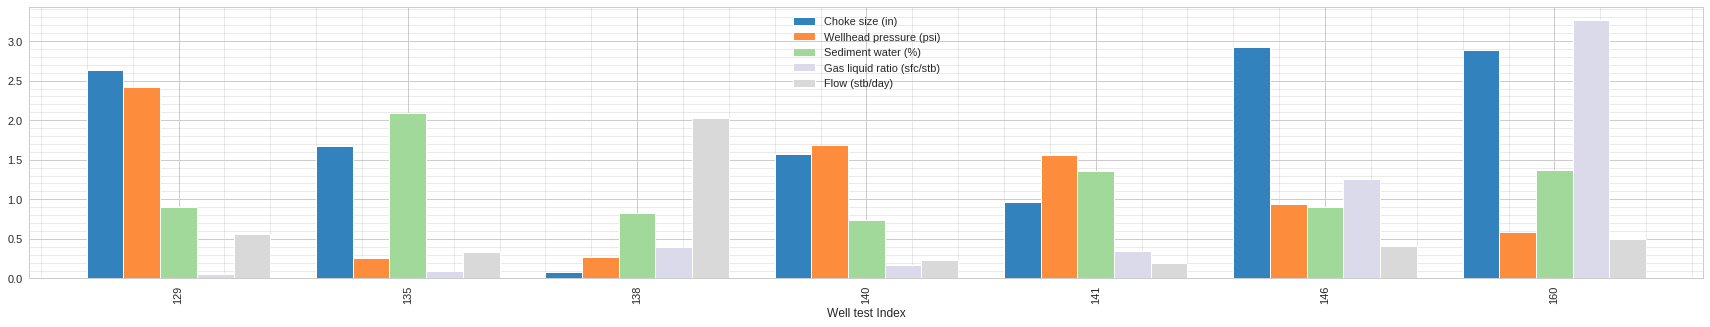

In [0]:

bp2=RE_per_dim.iloc[0:7].plot(kind='bar', figsize=(30,5), align='center', width=0.8, cmap = plt.get_cmap("tab20c"), edgecolor='w', linewidth=1)
plt.minorticks_on()
plt.xlabel('Well test Index')
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

In [0]:
data_outliers = test_x_split.loc[[129, 135, 146, 160, 173, 174, 179, 180],['Choke size (in)', 'Wellhead pressure (psi)', 'Sediment water (%)','Gas liquid ratio (sfc/stb)', 'Flow (stb/day)']]

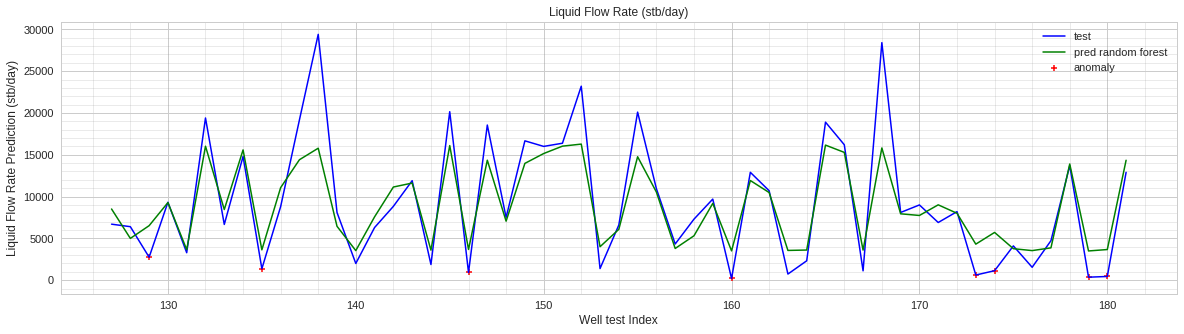

In [0]:
fig, ax=plt.subplots(figsize=(20,5))

ax.plot(test_x_split.index, test_x_split['Flow (stb/day)'], color='blue', marker = 'x', label="test")
ax.plot(test_x_split.index, prediction_frame_rescale['Flow (stb/day)'], color='green', marker = '+' ,label="pred random forest")
ax.scatter(data_outliers.index, data_outliers['Flow (stb/day)'] , color='red', marker = '+' ,label="anomaly")

plt.ylabel('Liquid Flow Rate Prediction (stb/day)'); plt.xlabel('Well test Index'); plt.title('Liquid Flow Rate (stb/day)');
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

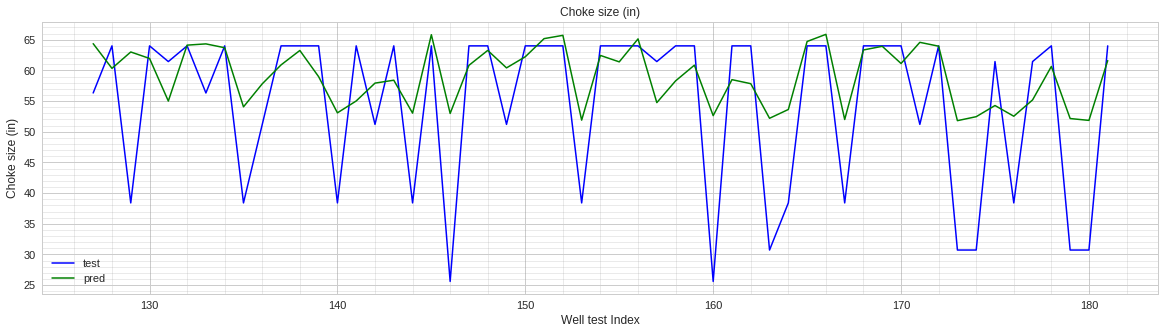

In [0]:
fig, ax=plt.subplots(figsize=(20,5))

ax.plot(test_x_split.index, test_x_split['Choke size (in)'], color='blue', marker = 'x', label="test")
ax.plot(test_x_split.index, prediction_frame_rescale['Choke size (in)'], color='green', marker = '+' ,label="pred")


plt.ylabel('Choke size (in)'); plt.xlabel('Well test Index'); plt.title('Choke size (in)');
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

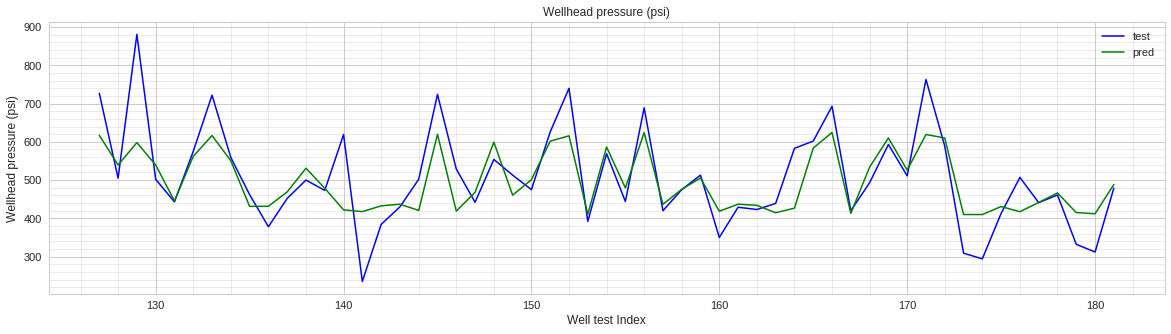

In [0]:
fig, ax=plt.subplots(figsize=(20,5))

ax.plot(test_x_split.index, test_x_split['Wellhead pressure (psi)'], color='blue', marker = 'x', label="test")
ax.plot(test_x_split.index, prediction_frame_rescale['Wellhead pressure (psi)'], color='green', marker = '+' ,label="pred")


plt.ylabel('Wellhead pressure (psi)'); plt.xlabel('Well test Index'); plt.title('Wellhead pressure (psi)');
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

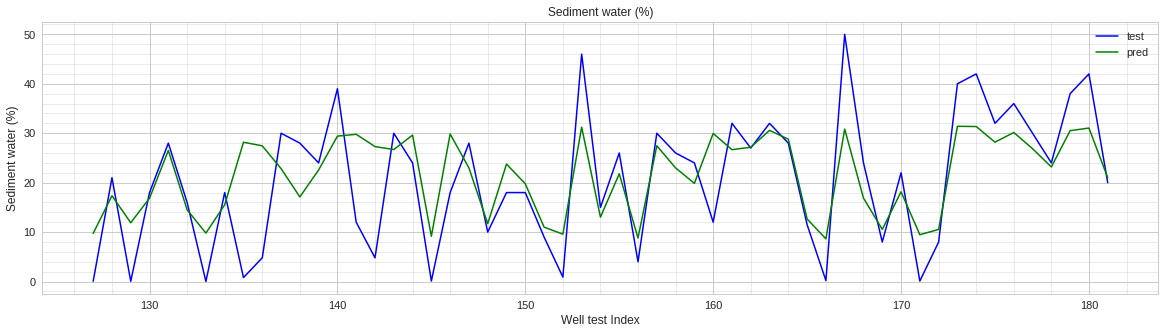

In [0]:
fig, ax=plt.subplots(figsize=(20,5))

ax.plot(test_x_split.index, test_x_split['Sediment water (%)'], color='blue', marker = 'x', label="test")
ax.plot(test_x_split.index, prediction_frame_rescale['Sediment water (%)'], color='green', marker = '+' ,label="pred")


plt.ylabel('Sediment water (%)'); plt.xlabel('Well test Index'); plt.title('Sediment water (%)');
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

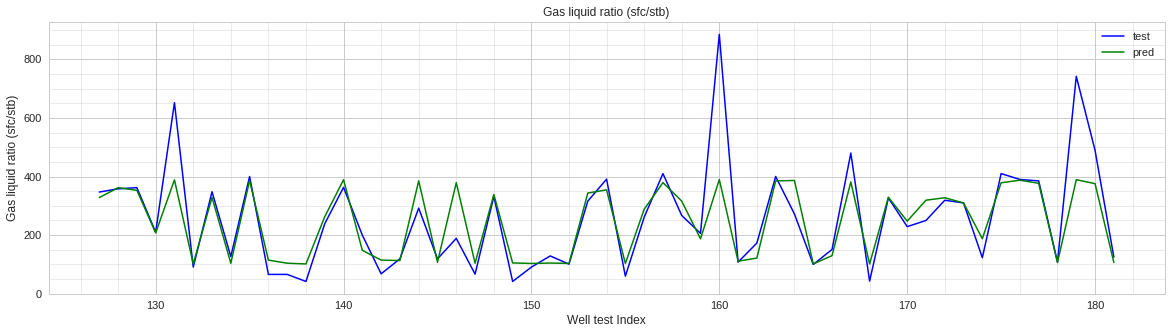

In [0]:
fig, ax=plt.subplots(figsize=(20,5))

ax.plot(test_x_split.index, test_x_split['Gas liquid ratio (sfc/stb)'], color='blue', marker = 'x', label="test")
ax.plot(test_x_split.index, prediction_frame_rescale['Gas liquid ratio (sfc/stb)'], color='green', marker = '+' ,label="pred")


plt.ylabel('Gas liquid ratio (sfc/stb)'); plt.xlabel('Well test Index'); plt.title('Gas liquid ratio (sfc/stb)');
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()
fig.savefig('plot.pdf')